In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_yellowcab = pd.read_csv('./Yellowcab.csv')
df_city = pd.read_csv('./City.csv')

In [4]:
df_yellowcab

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,0,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542
1,1,10085826,2016-10-08,Yellow Cab,ATLANTA GA,48.00,745.83,685.4400,27602,Cash,Male,23,8542
2,2,10254432,2017-11-11,Yellow Cab,ATLANTA GA,36.10,536.66,459.1920,27602,Cash,Male,23,8542
3,3,10420933,2018-12-06,Yellow Cab,ATLANTA GA,7.98,154.34,107.2512,27602,Cash,Male,23,8542
4,4,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274676,274676,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
274677,274677,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454
274678,274678,10439841,2018-01-03,Yellow Cab,TUCSON AZ,26.64,430.50,383.6160,41155,Cash,Male,31,17284
274679,274679,10439843,2018-12-31,Yellow Cab,TUCSON AZ,6.42,116.99,90.1368,40467,Cash,Female,41,14165


In [5]:
df_yellowcab.drop('Unnamed: 0', axis=1, inplace=True)
df_yellowcab.rename(columns={'Date of Travel':'Date', 'KM Travelled':'KM_Travel','Cost of Trip':'Cost_Trip','Income (USD/Month)':'Income'}, inplace=True)

In [6]:
df_yellowcab.describe()

,Transaction ID,KM_Travel,Price Charged,Cost_Trip,Customer ID,Age,Income
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817
std,1.269829e+05,12.234298,288.386166,162.548986,21830.791423,12.578625,7962.727062
min,1.000038e+07,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000
25%,1.011084e+07,11.990000,226.680000,158.400000,2403.000000,25.000000,8439.000000
50%,1.021987e+07,22.440000,425.060000,295.596000,6445.000000,33.000000,14676.000000
75%,1.032939e+07,32.960000,633.880000,432.432000,38916.000000,42.000000,21023.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000


In [7]:
df_num = df_yellowcab.select_dtypes(include=np.number)
df_num

,Transaction ID,KM_Travel,Price Charged,Cost_Trip,Customer ID,Age,Income
0,10000384,33.93,1341.17,464.1624,27602,23,8542
1,10085826,48.00,745.83,685.4400,27602,23,8542
2,10254432,36.10,536.66,459.1920,27602,23,8542
3,10420933,7.98,154.34,107.2512,27602,23,8542
4,10000385,42.18,1412.06,516.2832,27594,28,3901
...,...,...,...,...,...,...,...
274676,10439838,19.00,303.77,232.5600,41414,38,3960
274677,10439840,5.60,92.42,70.5600,41677,23,19454
274678,10439841,26.64,430.50,383.6160,41155,31,17284
274679,10439843,6.42,116.99,90.1368,40467,41,14165


In [8]:
df_num['Kurtosis'] = df_num.kurtosis(axis=1)
df_num['Skewness'] = df_num.skew(axis=1)
df_num.describe()

,Transaction ID,KM_Travel,Price Charged,Cost_Trip,Customer ID,Age,Income,Kurtosis,Skewness
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817,6.999787,2.828372
std,1.269829e+05,12.234298,288.386166,162.548986,21830.791423,12.578625,7962.727062,0.000241,0.000062
min,1.000038e+07,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000,6.999142,2.828202
25%,1.011084e+07,11.990000,226.680000,158.400000,2403.000000,25.000000,8439.000000,6.999656,2.828337
50%,1.021987e+07,22.440000,425.060000,295.596000,6445.000000,33.000000,14676.000000,6.999906,2.828403
75%,1.032939e+07,32.960000,633.880000,432.432000,38916.000000,42.000000,21023.000000,6.999967,2.828419
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000,6.999999,2.828427


In [9]:
df_city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [10]:
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [11]:
# Converting Objects to Intenger
df_city['Population'] = df_city['Population'].str.replace(',','')
df_city['Users'] = df_city['Users'].str.replace(',','')
df_city['Population'] = df_city['Population'].astype(int)
df_city['Users'] = df_city['Users'].astype(int)

In [12]:
df_city['Avg_Users'] = round(df_city['Users'] / df_city['Population'] * 100 , 1)

In [13]:
df_city

,City,Population,Users,Avg_Users
0,NEW YORK NY,8405837,302149,3.6
1,CHICAGO IL,1955130,164468,8.4
2,LOS ANGELES CA,1595037,144132,9.0
3,MIAMI FL,1339155,17675,1.3
4,SILICON VALLEY,1177609,27247,2.3
5,ORANGE COUNTY,1030185,12994,1.3
6,SAN DIEGO CA,959307,69995,7.3
7,PHOENIX AZ,943999,6133,0.6
8,DALLAS TX,942908,22157,2.3
9,ATLANTA GA,814885,24701,3.0


<AxesSubplot: xlabel='Age', ylabel='Count'>

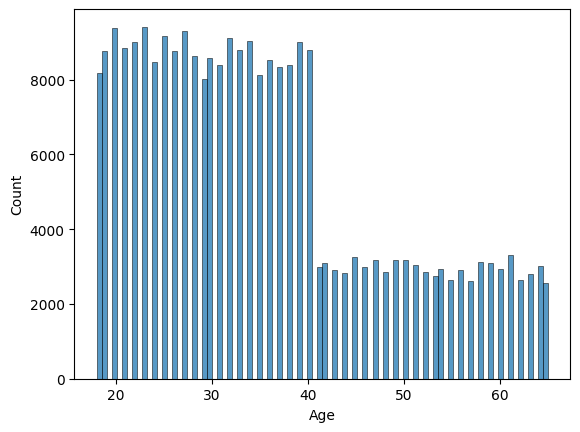

In [14]:
sns.histplot(df_yellowcab.Age)

<AxesSubplot: >

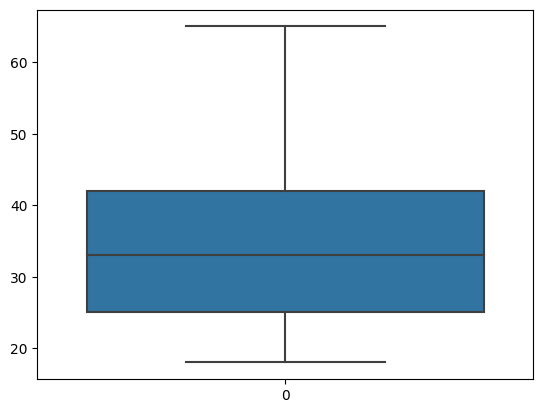

In [15]:
sns.boxplot(df_yellowcab.Age)

<AxesSubplot: xlabel='Price Charged', ylabel='Count'>

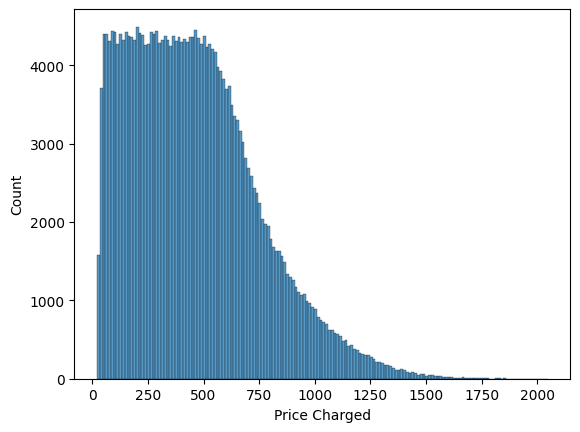

In [16]:
sns.histplot(df_yellowcab['Price Charged'])

<AxesSubplot: >

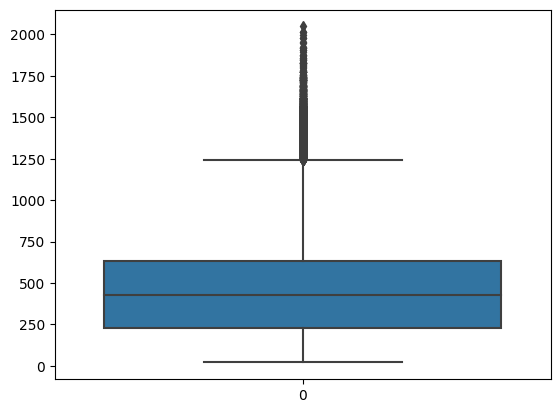

In [17]:
sns.boxplot(df_yellowcab['Price Charged'])

<AxesSubplot: xlabel='Income', ylabel='Count'>

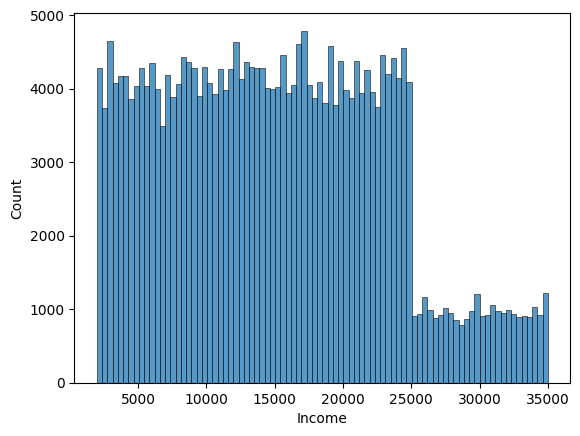

In [18]:
sns.histplot(df_yellowcab.Income)

<AxesSubplot: >

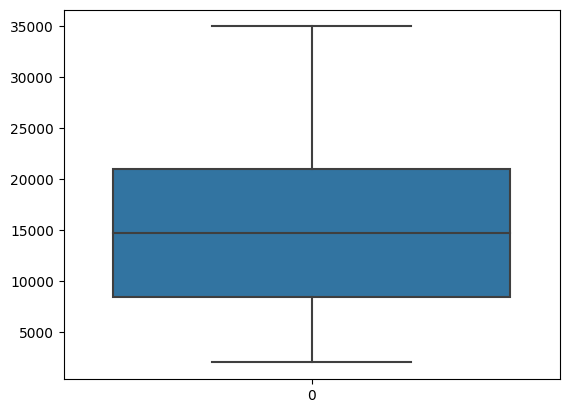

In [19]:
sns.boxplot(df_yellowcab.Income)

<AxesSubplot: xlabel='Cost_Trip', ylabel='Count'>

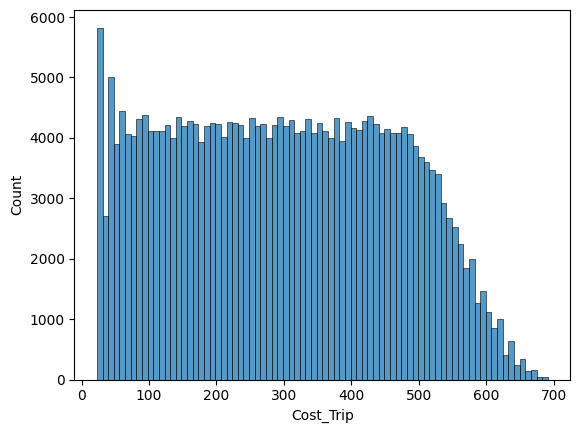

In [20]:
sns.histplot(df_yellowcab.Cost_Trip)

<AxesSubplot: >

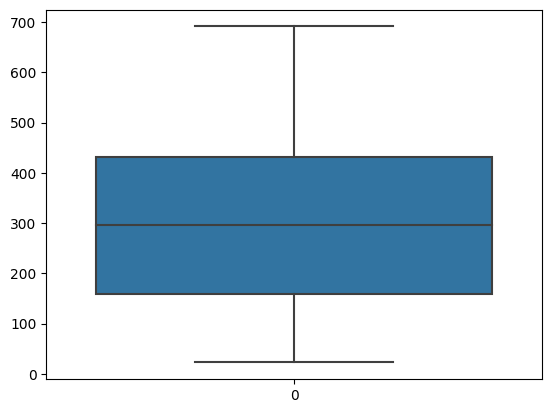

In [21]:
sns.boxplot(df_yellowcab.Cost_Trip)

<AxesSubplot: xlabel='Payment_Mode', ylabel='Count'>

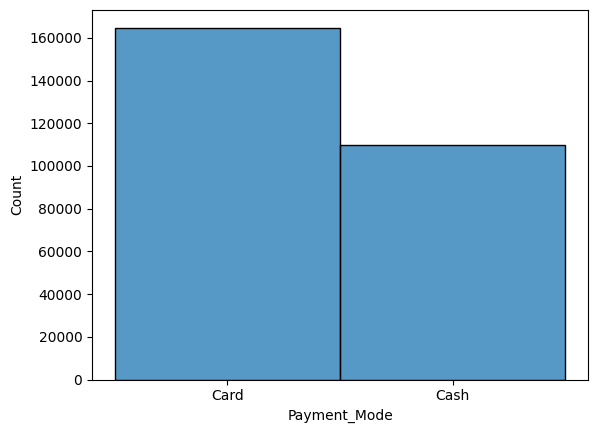

In [22]:
sns.histplot(df_yellowcab.Payment_Mode)

<AxesSubplot: xlabel='Gender', ylabel='Count'>

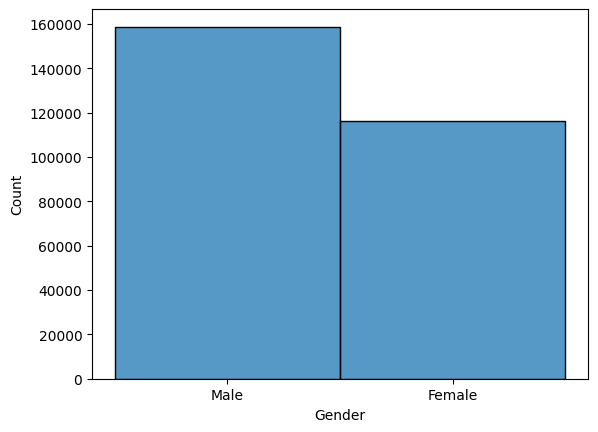

In [23]:
sns.histplot(df_yellowcab.Gender)

<AxesSubplot: xlabel='KM_Travel', ylabel='Count'>

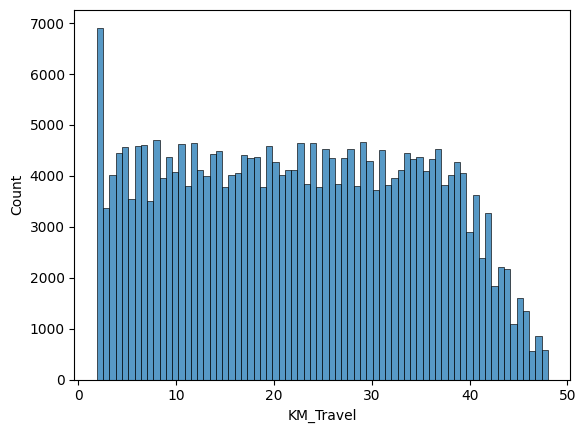

In [24]:
sns.histplot(df_yellowcab.KM_Travel)

<AxesSubplot: >

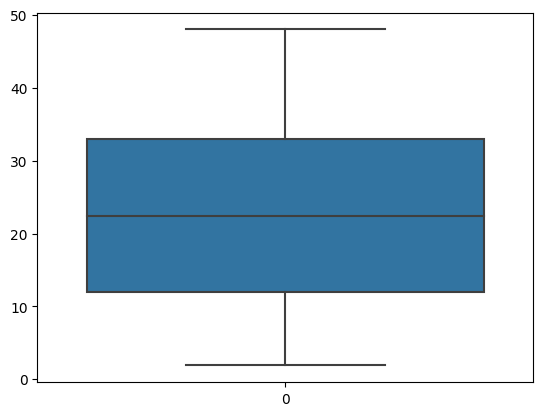

In [25]:
sns.boxplot(df_yellowcab.KM_Travel)

In [26]:
df_yellowcab['Profit'] = df_yellowcab['Price Charged'] - df_yellowcab['Cost_Trip']

<AxesSubplot: xlabel='Profit', ylabel='Count'>

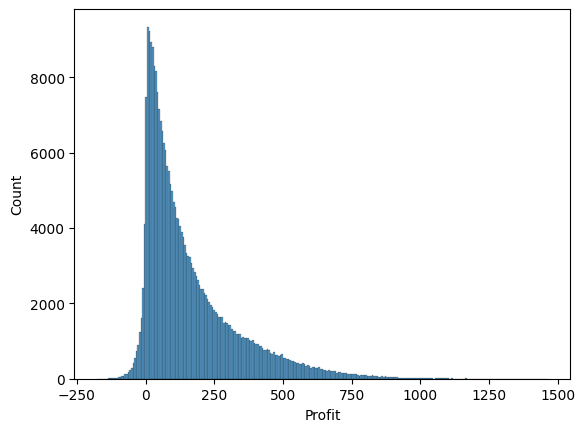

In [28]:
sns.histplot(df_yellowcab.Profit)

<AxesSubplot: >

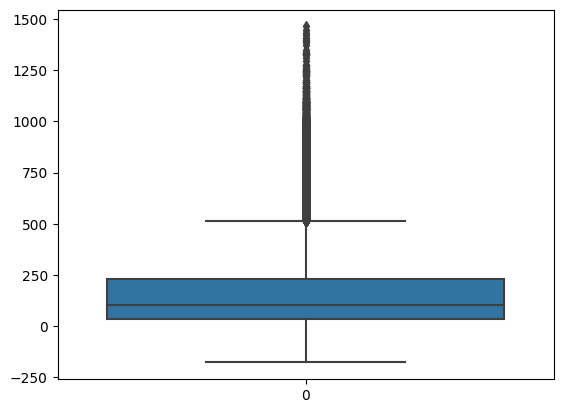

In [30]:
sns.boxplot(df_yellowcab.Profit)

In [31]:
df_yellowcab.Profit.describe()

count    274681.000000
mean        160.259986
std         171.823833
min        -176.930800
25%          37.180000
50%         102.000000
75%         228.670400
max        1463.966000
Name: Profit, dtype: float64

In [32]:
df_yellowcab.corr()

C:\Users\josejesus\AppData\Local\Temp\ipykernel_5640\3257570276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_yellowcab.corr()


,Transaction ID,KM_Travel,Price Charged,Cost_Trip,Customer ID,Age,Income,Profit
Transaction ID,1.000000,-0.002641,-0.058665,-0.002859,-0.017240,-0.000885,-0.000103,-0.095758
KM_Travel,-0.002641,1.000000,0.859709,0.993390,0.000692,0.000838,-0.000850,0.503152
Price Charged,-0.058665,0.859709,1.000000,0.853996,-0.208935,-0.002721,0.003818,0.870485
Cost_Trip,-0.002859,0.993390,0.853996,1.000000,0.000617,0.000946,-0.000768,0.487311
Customer ID,-0.017240,0.000692,-0.208935,0.000617,1.000000,-0.005145,-0.015681,-0.351256
Age,-0.000885,0.000838,-0.002721,0.000946,-0.005145,1.000000,0.001759,-0.005462
Income,-0.000103,-0.000850,0.003818,-0.000768,-0.015681,0.001759,1.000000,0.007136
Profit,-0.095758,0.503152,0.870485,0.487311,-0.351256,-0.005462,0.007136,1.000000


C:\Users\josejesus\AppData\Local\Temp\ipykernel_5640\3808481886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_yellowcab.corr())


<AxesSubplot: >

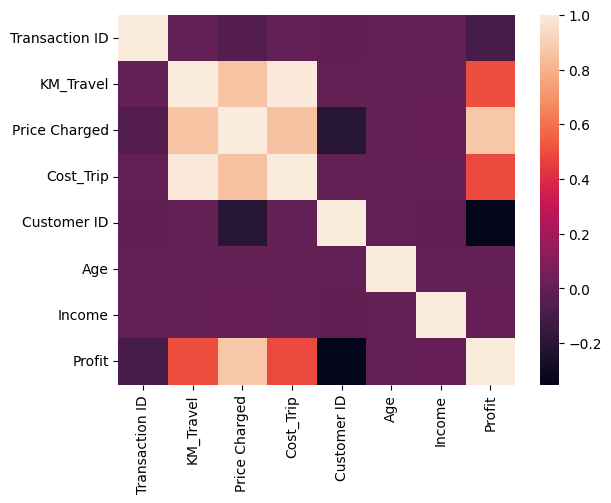

In [33]:
sns.heatmap(df_yellowcab.corr())